In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv('./datasets/Clean_Dataset.csv',index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [34]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

## Integer Mapping of stops

In [35]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [36]:
stops_mapping = {'zero': 0 , 'one': 1, 'two_or_more': 2}
df['stops'] = df['stops'].map(stops_mapping)


In [37]:
df['stops'].value_counts()

stops
1    250863
0     36004
2     13286
Name: count, dtype: int64

In [38]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 27.5+ MB


In [40]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


Pre-processing




In [41]:
time_mapping = {
    'Early_Morning': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4,
    'Late_Night': 5
}

df['arrival_time'] = df['arrival_time'].map(time_mapping)
df['departure_time'] = df['departure_time'].map(time_mapping)


In [42]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,3,0,4,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,0,0,1,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,0,0,0,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,1,0,2,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,1,0,1,Mumbai,Economy,2.33,1,5955


In [43]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le_airline = LabelEncoder()
le_class = LabelEncoder()
le_flight = LabelEncoder()

# Fit and transform the airline and class columns
df['airline'] = le_airline.fit_transform(df['airline'])
df['class'] = le_class.fit_transform(df['class'])
df['flight'] = le_class.fit_transform(df['flight'])



In [44]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,Delhi,3,0,4,Mumbai,1,2.17,1,5953
1,4,1387,Delhi,0,0,1,Mumbai,1,2.33,1,5953
2,0,1213,Delhi,0,0,0,Mumbai,1,2.17,1,5956
3,5,1559,Delhi,1,0,2,Mumbai,1,2.25,1,5955
4,5,1549,Delhi,1,0,1,Mumbai,1,2.33,1,5955


In [45]:
city_mapping = {
    'Delhi': 0,
    'Mumbai': 1,
    'Bangalore': 2,
    'Kolkata': 3,
    'Hyderabad': 4,
    'Chennai': 5
}

df['source_city'] = df['source_city'].map(city_mapping)
df['destination_city'] = df['destination_city'].map(city_mapping)


## Final Processed Dataset

In [46]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,0,3,0,4,1,1,2.17,1,5953
1,4,1387,0,0,0,1,1,1,2.33,1,5953
2,0,1213,0,0,0,0,1,1,2.17,1,5956
3,5,1559,0,1,0,2,1,1,2.25,1,5955
4,5,1549,0,1,0,1,1,1,2.33,1,5955


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(3), int64(7)
memory usage: 24.0 MB


In [48]:
df.to_csv('./datasets/processed_data.csv', index = False)

In [49]:
df = pd.read_csv('./datasets/processed_data.csv')

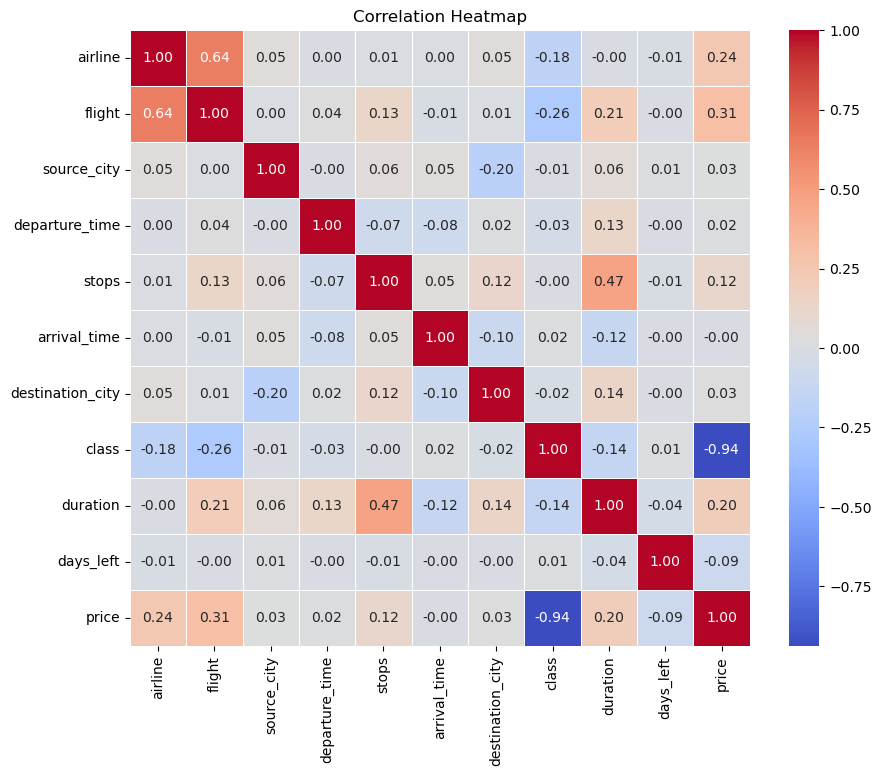

In [50]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


In [51]:
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

def load_model(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [52]:
# storing the Dependent Variables in X and Independent Variable in Y
X=df.drop(['price'],axis=1)
y=df['price']

In [53]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [54]:
from sklearn.preprocessing import StandardScaler 
 
scaler = StandardScaler() 
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)


In [55]:
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [56]:
r2_scores = {}

In [57]:
def evaluate_metrics(X_train, X_test, y_train_pred, y_test_pred,model_name = None):
    n_train, k_train = X_train.shape
    n_test, k_test = X_test.shape

    # MSE and RMSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    # R2 and Adjusted R2
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    if model_name is not None:
        r2_scores[model_name] = r2_test

    adj_r2_train = adjusted_r2_score(r2_train, n_train, k_train)
    adj_r2_test = adjusted_r2_score(r2_test, n_test, k_test)

    # MAE
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Print results
    print(f'Train MSE: {mse_train}, Test MSE: {mse_test}')
    print(f'Train RMSE: {rmse_train}, Test RMSE: {rmse_test}')
    print(f'Train R2: {r2_train}, Test R2: {r2_test}')
    print(f'Train Adjusted R2: {adj_r2_train}, Test Adjusted R2: {adj_r2_test}')
    print(f'Train MAE: {mae_train}, Test MAE: {mae_test}')


In [58]:
#RandomForest with scaled data
from sklearn.ensemble import RandomForestRegressor
rf_regressor_scaled = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_scaled.fit(x_train_scaled, y_train)

y_pred = rf_regressor_scaled.predict(X_test)
y_train_pred = rf_regressor_scaled.predict(X_train)

evaluate_metrics(x_train_scaled,x_test_scaled,y_train_pred,y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rf_r2_scaled = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R2-score: {rf_r2_scaled}")

Train MSE: 734721202.9190644, Test MSE: 733506692.7201797
Train RMSE: 27105.7411431428, Test RMSE: 27083.32868611574
Train R2: -0.42550869870433394, Test R2: -0.42520776125774873
Train Adjusted R2: -0.4255765490536365, Test Adjusted R2: -0.4253660561165544
Train MAE: 16389.975594625594, Test MAE: 16372.56981304


In [59]:
# save_model(rf_regressor_scaled, './models/random_forest_scaled.pkl')

In [60]:
X.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,1408,0,3,0,4,1,1,2.17,1
1,4,1387,0,0,0,1,1,1,2.33,1
2,0,1213,0,0,0,0,1,1,2.17,1
3,5,1559,0,1,0,2,1,1,2.25,1
4,5,1549,0,1,0,1,1,1,2.33,1


In [61]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [62]:
y_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Linear Regression')

# mse = mean_squared_error(y_test, y_pred)
# lr_r2 = r2_score(y_test, y_pred)

# # 5. Print results
# print(f"Mean Squared Error: {mse}")
# print(f"R2-score: {lr_r2}")

Train MSE: 48245190.59742433, Test MSE: 48157230.15686191
Train RMSE: 6945.875797725174, Test RMSE: 6939.541062409092
Train R2: 0.9063945091089838, Test R2: 0.9064302222987105
Train Adjusted R2: 0.9063900537413951, Test Adjusted R2: 0.9064198296983105
Train MAE: 4547.665526997082, Test MAE: 4522.957292567414


In [63]:
# save_model(rf_regressor_scaled, './models/linear_regression.pkl')

In [64]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [65]:
y_pred = rf_regressor.predict(X_test)
y_train_pred = rf_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Random Forest')


Train MSE: 779840.7130585415, Test MSE: 5471880.385162119
Train RMSE: 883.085903555561, Test RMSE: 2339.2050754822926
Train R2: 0.9984869502667787, Test R2: 0.9893681046526155
Train Adjusted R2: 0.9984868782497135, Test Adjusted R2: 0.9893669237901345
Train MAE: 332.0624323589545, Test MAE: 883.7524054008637


In [66]:
# save_model(rf_regressor, './models/random_forest.pkl')

In [67]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [68]:
y_pred = dt_regressor.predict(X_test)
y_train_pred = dt_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Decision Tree')

Train MSE: 46490.64797301692, Test MSE: 8859011.072528362
Train RMSE: 215.6169009447472, Test RMSE: 2976.409090250929
Train R2: 0.9999097986789675, Test R2: 0.9827868900680197
Train Adjusted R2: 0.9999097943856291, Test Adjusted R2: 0.9827849782437367
Train MAE: 10.541387642169623, Test MAE: 917.5945923935172


In [69]:
# save_model(dt_regressor, './models/decision_tree.pkl')

In [73]:
#Bagging Regressor
from sklearn.ensemble import BaggingRegressor
base_estimator = DecisionTreeRegressor(random_state=42)
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=300, random_state=42)
bagging_regressor.fit(X_train, y_train)

y_pred = bagging_regressor.predict(X_test)
y_train_pred = bagging_regressor.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Bagging Regressor')

Train MSE: 762143.8640103791, Test MSE: 5447887.383248699
Train RMSE: 873.0085131374029, Test RMSE: 2334.0709893335934
Train R2: 0.9985212857564278, Test R2: 0.9894147231945896
Train Adjusted R2: 0.9985212153736388, Test Adjusted R2: 0.989413547509933
Train MAE: 329.4566885728255, Test MAE: 882.5435242518155


In [74]:
# save_model(bagging_regressor, './models/bagging_regressor.pkl')

In [76]:
#XGB
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)
y_train_pred = xgb_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'XGBoost')


Train MSE: 11927333.997497408, Test MSE: 12472841.080432197
Train RMSE: 3453.5972546748135, Test RMSE: 3531.6909661566083
Train R2: 0.9768585440324397, Test R2: 0.9757651973878474
Train Adjusted R2: 0.9768574425618753, Test Adjusted R2: 0.9757625056787773
Train MAE: 1956.4476967666396, Test MAE: 1974.4517652213651


In [77]:
# save_model(xgb_reg, './models/xgboost.pkl')

In [78]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)
y_train_pred = ridge_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Ridge')


Train MSE: 48245190.84475904, Test MSE: 48157201.75508232
Train RMSE: 6945.875815529604, Test RMSE: 6939.539016035742
Train R2: 0.9063945086291042, Test R2: 0.906430277483533
Train Adjusted R2: 0.9063900532614927, Test Adjusted R2: 0.9064198848892623
Train MAE: 4547.684959278993, Test MAE: 4522.976255114634


In [79]:
# save_model(ridge_reg, './models/ridge.pkl')

In [80]:
#Lasso Regression
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
y_train_pred = lasso_reg.predict(X_train)

evaluate_metrics(X_train,X_test,y_train_pred,y_pred,'Lasso')


Train MSE: 48190988.8454174, Test MSE: 48328075.80894897
Train RMSE: 6941.972979306201, Test RMSE: 6951.839742755077
Train R2: 0.9064458070263018, Test R2: 0.9062468715473841
Train Adjusted R2: 0.9064419107369618, Test Adjusted R2: 0.906231251232747
Train MAE: 4542.203930782386, Test MAE: 4519.116409231099


In [81]:
# save_model(lasso_reg, './models/lasso.pkl')

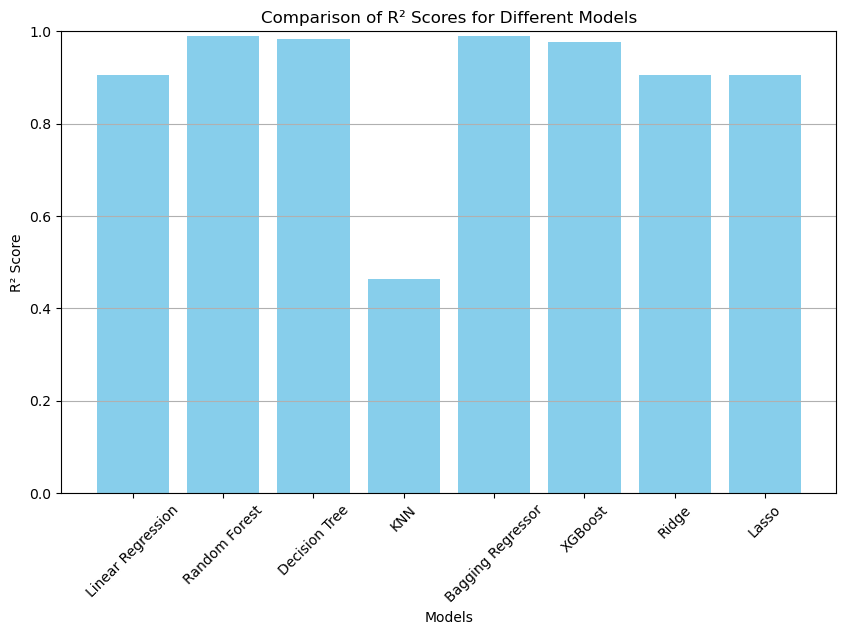

In [82]:
# Plotting the bar chart
models = list(r2_scores.keys())
r2_values = list(r2_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='skyblue')  
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.title('Comparison of R² Scores for Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)  
plt.grid(axis='y')  

# Display the plot
plt.show()
